In [117]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

#modelling
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [155]:
df = pd.read_csv('data\Stud_performance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [234]:
X = df.drop(columns=["math score"], axis =1)
y = df['math score']

In [235]:
X.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [236]:
# Seperated categorical and numerical columns
n_features = [feature for feature in df.columns if df[feature].dtype != 'O'  and feature != 'math score']
c_features = [feature for feature in df.columns if df[feature].dtype =='O']
# n_features = X.select_dtypes(exclude="object").columns
# c_features = X.select_dtypes(include="object").columns
print(n_features) 
c_features


['reading score', 'writing score']


['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [237]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
OneHot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",OneHot_transformer,c_features),
        ("StandardScaler",numeric_transformer, n_features)
    ]
)

In [238]:
X = preprocessor.fit_transform(X)

In [239]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [240]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

# Created an evaluate function to know all the metrics

In [241]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    
    return mae,mse,rmse,r2_square

In [242]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_List_test =[]
r2_list_train = []

for i in range(len(list(models))):
   model = list(models.values())[i]
   
   model.fit(X_train, y_train)
   
   # Make prediction
   y_train_pred = model.predict(X_train)
   y_test_pred = model.predict(X_test)
   
   #Evaluate model Train and Test dataset
   model_train_mae, model_train_rmse, model_train_r2,model_train_mse = evaluate_model(y_train,y_train_pred)
   model_test_mae, model_test_rmse, model_test_r2, model_test_mse = evaluate_model(y_test, y_test_pred)
   
   print(list(models.keys())[i])
   
   model_list.append(list(models.keys())[i])
   
   print("\nModel performance for training set")
   print("Root Mean Squared Error :{:.4f}".format(model_train_rmse))
   print("Mean Absolute Error :{:.4f}".format(model_train_mae))
   print("Mean Squared Error :{:.4f}".format(model_train_mse))
   print("R2 score :{:.4f}".format(model_train_r2))
   print("\n-------------------------------")
   print("\nModel performance for test set")
   print("Root Mean Squared Error :{:.4f}".format(model_test_rmse))
   print("Mean Absolute Error :{:.4f}".format(model_test_mae))
   print("Mean Squared Error :{:.4f}".format(model_test_mse))
   print("R2 score :{:.4f}".format(model_test_r2))
   print("\n-------------------------------")
   print("\n-------------------------------")


   r2_List_test.append(model_test_r2)
   r2_list_train.append(model_train_r2)
   
print(model_list)
print(r2_List_test)
print(r2_list_train)
   

Linear Regression

Model performance for training set
Root Mean Squared Error :28.3808
Mean Absolute Error :4.2788
Mean Squared Error :0.8741
R2 score :5.3274

-------------------------------

Model performance for test set
Root Mean Squared Error :29.2638
Mean Absolute Error :4.2259
Mean Squared Error :0.8797
R2 score :5.4096

-------------------------------

-------------------------------
Lasso

Model performance for training set
Root Mean Squared Error :43.4784
Mean Absolute Error :5.2063
Mean Squared Error :0.8071
R2 score :6.5938

-------------------------------

Model performance for test set
Root Mean Squared Error :42.5064
Mean Absolute Error :5.1579
Mean Squared Error :0.8253
R2 score :6.5197

-------------------------------

-------------------------------
Ridge

Model performance for training set
Root Mean Squared Error :28.3378
Mean Absolute Error :4.2650
Mean Squared Error :0.8743
R2 score :5.3233

-------------------------------

Model performance for test set
Root Mean 

# Results

In [243]:
import pandas as pd

df_results = pd.DataFrame({
    "Model Name": model_list,
    "Train R2 Score": r2_list_train,
    "Test R2 Score": r2_List_test
})
df_results["Difference"] = (df_results["Train R2 Score"] - df_results["Test R2 Score"]).abs()

pd.options.display.float_format = '{:.6f}'.format

df_results

,Model Name,Train R2 Score,Test R2 Score,Difference
0,Linear Regression,5.327359,5.409603,0.082244
1,Lasso,6.593816,6.519695,0.074121
2,Ridge,5.323325,5.390387,0.067062
3,K-Neighbors Regressor,5.712219,7.251621,1.539401
4,Decision Tree,0.279508,8.097530,7.818022
5,Random Forest Regressor,2.280935,5.979819,3.698884
6,XGBRegressor,1.007282,6.473307,5.466026
7,AdaBoost Regressor,5.797459,5.984977,0.187517


# Linear Regression score

In [244]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of Linear Regression Model : %.2f" %score)

Accuracy of Linear Regression Model : 87.97


# plotting y_pred and y_test

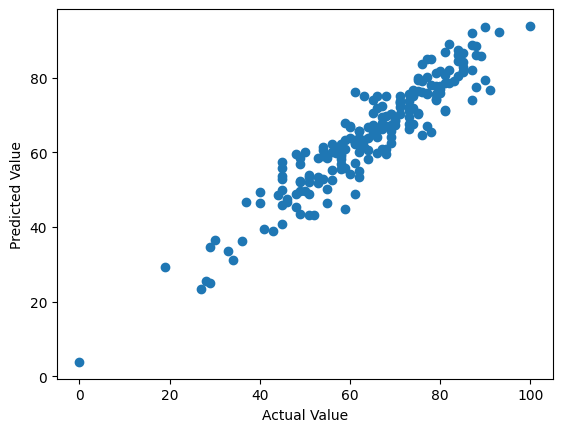

In [245]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

<Axes: xlabel='math score'>

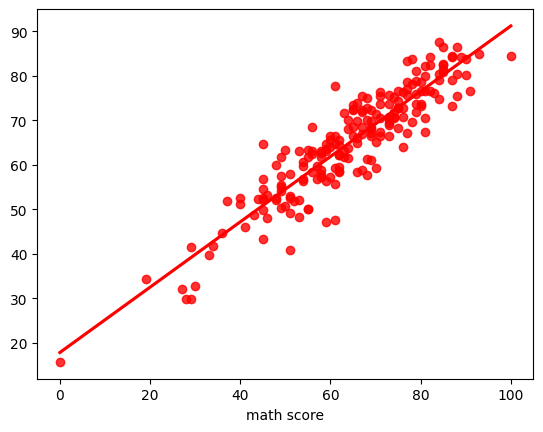

In [263]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [247]:
Lasso_model = Lasso(fit_intercept=True)
Lasso_model.fit(X_train, y_train)
y_pred = Lasso_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy for Lasso model : %.2f" %score)

Accuracy for Lasso model : 82.53
